<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

# Praktische Anwendungen

Module laden

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ipywidgets import widgets
from ipywidgets import interact
import plot_functions.plot_settings
%run plot_functions/resonant_column_interaction.ipynb

## Erste Eigenfrequenz eines Torsionsstabs mit Endmasse (Resonant Column)

![resonant_column.svg](https://github.com/nagelt/soil_dynamics/raw/master/Images/resonant_column.svg)

Verhältnis der verteilten Massenträgheit (Stab) zur konzentrierten (Endmasse): $M=\frac{I\rho l}{J_\mathrm{end}}$

In [2]:
#HIDDEN
resonant_column_plot()

interactive(children=(IntSlider(value=101, description='$M$ [%]:', max=301, min=1, step=10), Output()), _dom_c…

Aus $X=\kappa l$ folgt die Eigenkreisfrequenz $\omega_1=\kappa_1 c=X_1 \frac{c}{l}$

### Vergleich mit Einfreitheitsgradnäherung (masseloser Stab, statische Steifigkeit)

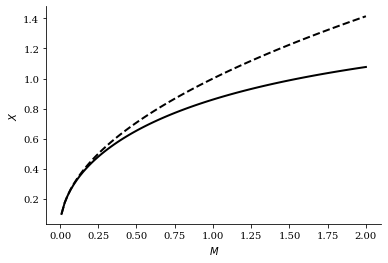

In [38]:
N_num = 100
M_num = np.linspace(0.01, 2, N_num)
X1dof_num = np.zeros(N_num)
X1_num = np.zeros(N_num)

for index_n, M_n in enumerate(M_num):
        fun = lambda X: M_n/X - np.tan(X)
        fun_prime = lambda X: -M_n*X**(-2) - (1 + np.tan(X)**2)
        x_guess = np.pi/4
        x_sol = fsolve(fun, x_guess, fprime=fun_prime)
        X1_num[index_n] = x_sol
        X1dof_num[index_n] = np.sqrt(M_n)

plt.plot(M_num, X1dof_num, 'k--', M_num, X1_num, 'k');
plt.xlabel('$M$');
plt.ylabel('$X$');

Die durch das vereinfachte Einfreiheitsgradmodell genäherte Grundfrequenz ist höher als die des Stabmodells ($X=\kappa l=\omega l/v^2$). 